# 09_CraneCam_ZHAW_Comparison
In diesem Jupyter Notebook werden Statistiken und Visualisierungen aus Daten RMSE-Werten der Metashape-Reports generiert.

Die Daten basieren auf Bildern folgender Aufnahmedaten der CraneCam an der ZHAW:

- 24.02.2025 
- 20.03.2025

### Import der Libraries

In [6]:
import pandas as pd
import glob
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import laspy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re
import traceback

### Definition der Grundlagedaten

In [7]:
# CSV-Verzeichnis
csv_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\09_CraneCam_ZHAW_Comparison\\90_BaseData\\CSV"
print("Daten in CSV-Verzeichnis:", os.listdir(csv_dir))

# # PointCloud-Verzeichnis auf HDD
# pc_hdd_dir = "F:\\530_PointClouds_UAV"
# print("Daten in PointCloud-Verzeichnis (HDD):", os.listdir(pc_hdd_dir))

# PointCloud-Verzeichnis 
pc_dir = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\09_CraneCam_ZHAW_Comparison\\90_BaseData\\PointCloud"
print("Daten in PointCloud-Verzeichnis:", os.listdir(pc_dir))


Daten in CSV-Verzeichnis: ['Vergleich_CraneCam_ZHAW.csv']
Daten in PointCloud-Verzeichnis: ['20250224_CraneCam_ZHAW_clipped.las', '20250320_CraneCam_ZHAW_clipped.las']


## 1. Analyse Report Data aus Metashape
Für die folgenden Unterkapitel werden Metadaten aus Metashape verwendet. Diese Metadaten bestehen aus Berechnungsparametern oder berechneten Anzahl Punkten oder Filtering Tresholds. Im Kapitel 1.2 und Kapitel 1.3 werden vorallem die Root Mean Square Error-Werte (RSME-Werte) für die Visualisierungen verwendet.

### 1.1 Import der CSV-Daten
Prüfung des CSV-Imports

In [8]:
# Laden des CSV Files
csv_path = "D:\\BTh11_Asuwertung_PC\\fhnw_code\\BTh11_Trieblaengenwachstum\\09_CraneCam_ZHAW_Comparison\\90_BaseData\\CSV\\Vergleich_CraneCam_ZHAW.csv"

# Alle CSVs einlesen und in einer Liste speichern
csv_file = pd.read_csv(csv_path)

# Vorschaue
display(HTML(csv_file.head(2).to_html(max_cols=200, notebook=True)))

,Aufnahme_ID,Datum,Verantwortlichkeit,Anzahl Kameras,Nadir ? [J/N],Anzahl Bilder,Format [H/Q],Windböhen ? [J/N],Accuracy,Key Point Limit,Tie Point Limit,Excl. Stationary tie pts.,guided img matching,adaptive model fitting,Start Tie Points,Automatic Filtering,manual Filtering,Reprojection error,Reconstruction uncertainty,Image count,Projection accuracy,Anzahl Control Points,Control Points X error [mm],Control Points Y error [mm],Control Points Z error [mm],Control Points XY error [mm],Control Points Total RMSE [mm],Control Points Total RMSE [pix],Anzahl Check Points,Check Points X error [mm],Check Points Y error [mm],Check Points Z error [mm],Check Points XY error [mm],Check Points Total RMSE [mm],Check Points Total RMSE [pix]
0,20250224_ZHAW,24.02.2025,terradata,2,J,323,Q,?,Highest,60 K,-,N,N,J,1363 K,1132 K,906 K,-,93,-,35,5,4.18,14.65,3.03,15.24,15.54,0.15,7,8.96,20.62,23.08,22.48,32.22,0.28
1,20250320_ZHAW,20.03.2025,terradata,2,J,453,Q,?,Highest,60 K,-,N,N,J,1886 K,1334 K,1067 K,-,144,-,16,5,3.37,13.36,3.49,13.78,14.21,0.17,7,9.98,21.43,24.68,23.64,34.18,0.33


### 1.2 Vergleich Root Mean Square Error (RMSE) pro UAV-Modell
Beschreibung der Visualisierung!

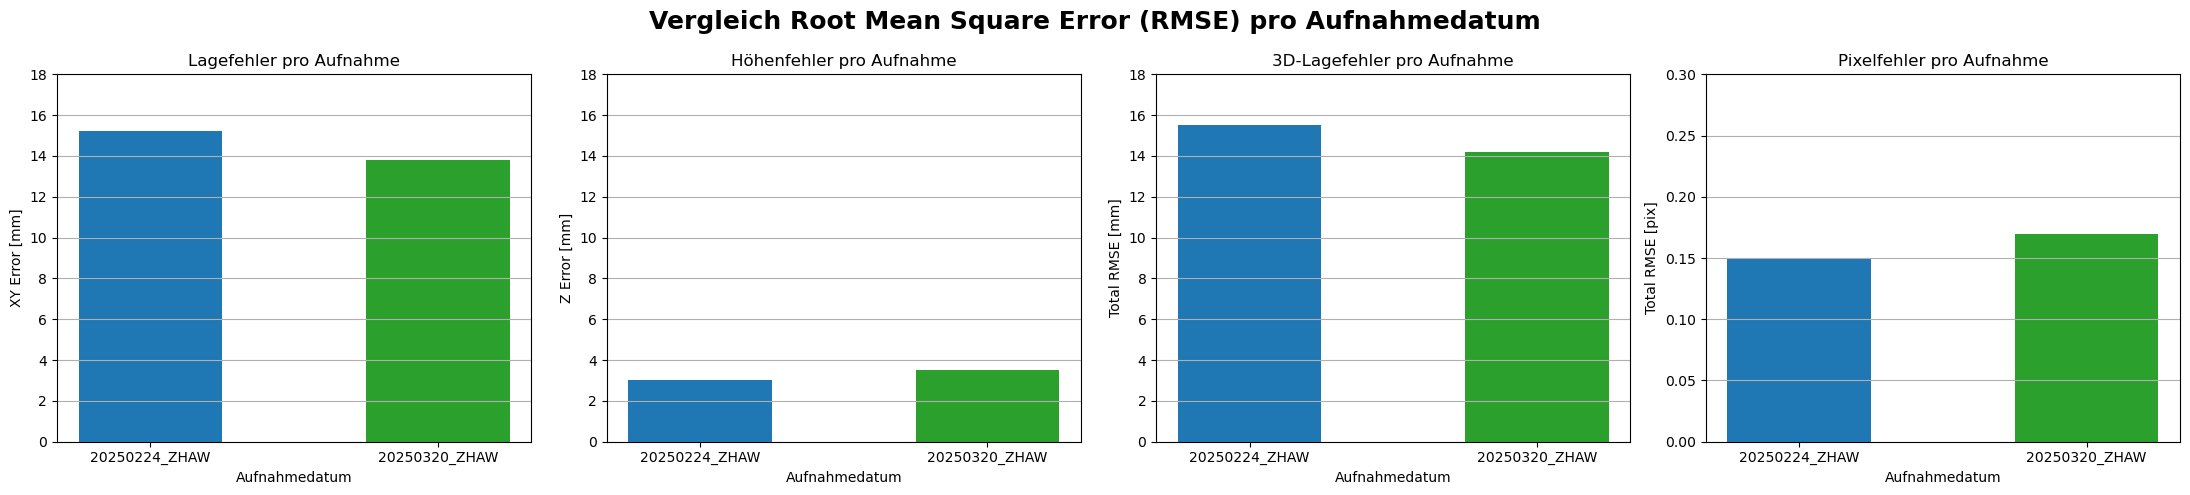

In [9]:
# Aufnahme_ID als kategoriale Variable setzen
csv_file["Aufnahme_ID"] = pd.Categorical(
    csv_file["Aufnahme_ID"],
    categories=["20250224_ZHAW", "20250320_ZHAW"],
    ordered=True
)

# Definition der Attribute: (Spaltenname, Plot-Titel, y-Achsen-Beschriftung, y-Achsen-Limit)
attributes = [
    ("Control Points XY error [mm]", "Lagefehler pro Aufnahme", "XY Error [mm]", (0, 18)),
    ("Control Points Z error [mm]", "Höhenfehler pro Aufnahme", "Z Error [mm]", (0, 18)),
    ("Control Points Total RMSE [mm]", "3D-Lagefehler pro Aufnahme", "Total RMSE [mm]", (0, 18)),
    ("Control Points Total RMSE [pix]", "Pixelfehler pro Aufnahme", "Total RMSE [pix]", (0, 0.3)),
]

# Farbzuweisung für Aufnahme_ID
aufnahme_colors = {
    "20250224_ZHAW": "#1f77b4",    # Blau
    "20250320_ZHAW": "#2ca02c",    # Grün
}

# Erstelle Subplots: je ein Diagramm pro Attribut
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

# Erstelle Balkendiagramme für jedes Attribut
for ax, (attr, title, ylabel, ylim) in zip(axes, attributes):
    # Für jede Aufnahme_ID wird ein Balken gezeichnet
    for aufnahme_id in csv_file["Aufnahme_ID"].cat.categories:
        filtered = csv_file[csv_file["Aufnahme_ID"] == aufnahme_id]
        if not filtered.empty:
            value = filtered[attr].values[0]
            ax.bar(aufnahme_id, value, color=aufnahme_colors[aufnahme_id], width=0.5)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Aufnahmedatum")
    ax.set_ylim(ylim)
    ax.grid(True, axis="y")

# Gesamttitel für alle Plots
fig.suptitle("Vergleich Root Mean Square Error (RMSE) pro Aufnahmedatum", fontsize=18, fontweight="bold")

plt.tight_layout()
plt.show()

### 1.3 Vergleich Root Mean Square Error (RMSE) pro Tie Point Filtering (TPF) Kategorie - Detailansicht Total Error

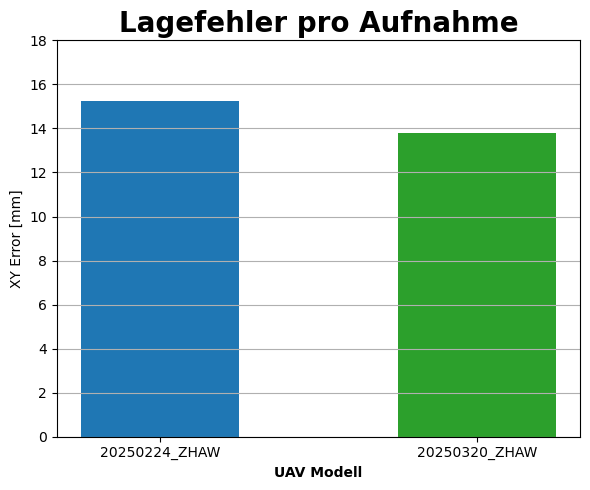

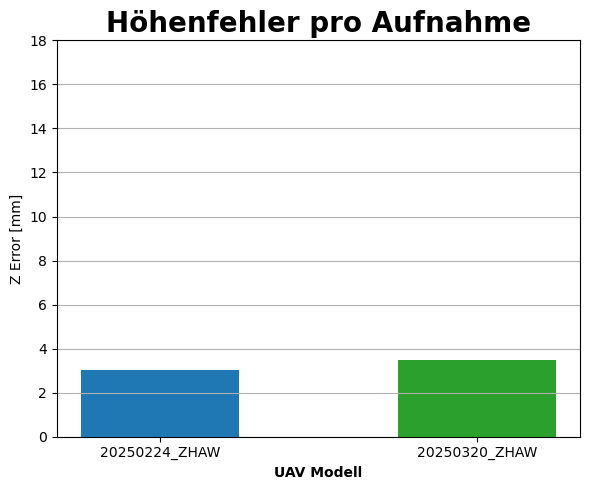

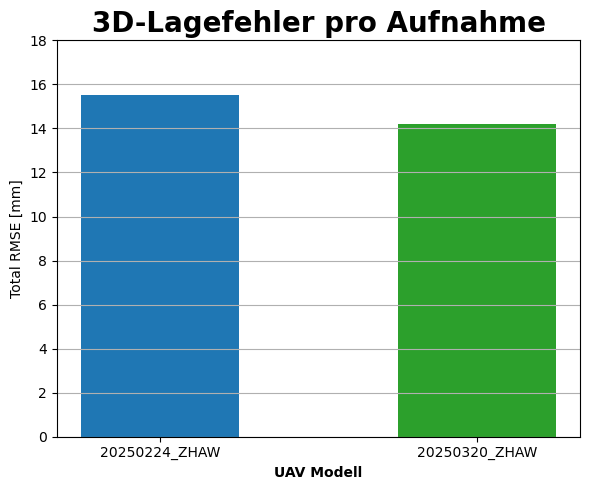

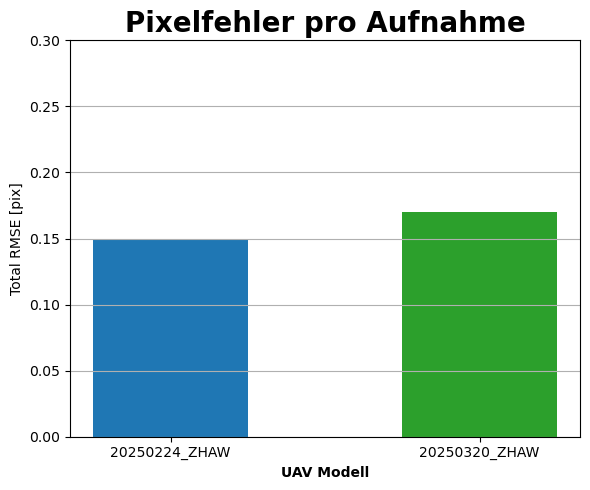

In [10]:
# Aufnahme_ID als kategoriale Variable setzen
csv_file["Aufnahme_ID"] = pd.Categorical(
    csv_file["Aufnahme_ID"],
    categories=["20250224_ZHAW", "20250320_ZHAW"],
    ordered=True
)

# Definition der Attribute: (Spaltenname, Plot-Titel, y-Achsen-Beschriftung, y-Achsen-Limit)
attributes = [
    ("Control Points XY error [mm]", "Lagefehler pro Aufnahme", "XY Error [mm]", (0, 18)),
    ("Control Points Z error [mm]", "Höhenfehler pro Aufnahme", "Z Error [mm]", (0, 18)),
    ("Control Points Total RMSE [mm]", "3D-Lagefehler pro Aufnahme", "Total RMSE [mm]", (0, 18)),
    ("Control Points Total RMSE [pix]", "Pixelfehler pro Aufnahme", "Total RMSE [pix]", (0, 0.3)),
]

# Farbzuweisung für Aufnahme_ID
aufnahme_colors = {
    "20250224_ZHAW": "#1f77b4",    # Blau
    "20250320_ZHAW": "#2ca02c",    # Grün
}

# Erstelle für jedes Attribut einen eigenen Detailplot
for attr, title, ylabel, ylim in attributes:
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Für jede UAV-ID wird ein Balken gezeichnet
    for aufnahme_id in csv_file["Aufnahme_ID"].cat.categories:
        # Extrahiere den Wert für das jeweilige Attribut
        value = csv_file[csv_file["Aufnahme_ID"] == aufnahme_id][attr].values[0]
        ax.bar(aufnahme_id, value, color=aufnahme_colors[aufnahme_id], width=0.5)
    
    ax.set_title(title, fontsize=20, fontweight="bold")
    ax.set_ylabel(ylabel)
    ax.set_xlabel("UAV Modell", fontweight= "bold")
    ax.set_ylim(ylim)
    ax.grid(True, axis="y")
    
    plt.tight_layout()
    plt.show()